In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ___Kernalized Support Vector Machines___
------------

In [1]:
# Linear SVMs served as effective classifiers by finding the decision boundary with maximum margin between classes.
# Linear SVMs work well with simple datasets where the classes are linearly separable.

In [3]:
# Linearly separable classes

In [7]:
x = np.arange(0, 50, step = 3)
x = np.append(x, np.arange(100, 150, step = 3))

In [10]:
x.size

34

In [17]:
y = np.append(np.random.randint(0, 100, size = 17), np.random.randint(200, 250, size = 17))
col = list(map(lambda x: "orange" if x >= 200 else "green", y))

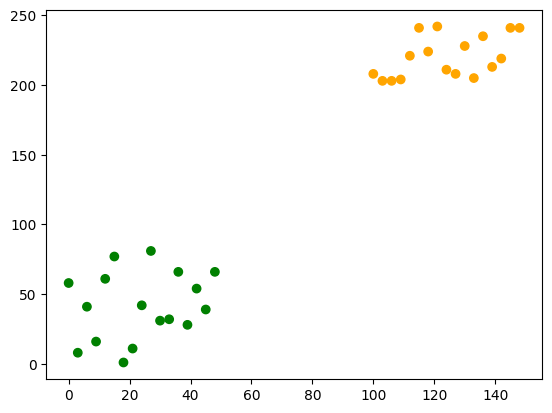

In [18]:
plt.scatter(x, y, c = col)
plt.show()

In [19]:
# But, in real world datasets, where different classes have clusters sporadically scattered throughout the feature space, 
# classification by a linear margin is not practical.
# Certain datasets are difficult for a linear classifier to classify using a hyperplane.

In [20]:
# Kernalized SVMs are a powerful extensions of linear SVMs.
# They can make up complex models that can go beyond linear decision boundaries.
# Kernalized SVMs can be used for both regression and classification.

In [21]:
# What Kernalized SVMs do is that they take the original features and transform them into a higher dimensional feature space.
# This transformed data becomes easier to classify using a linear classifier.

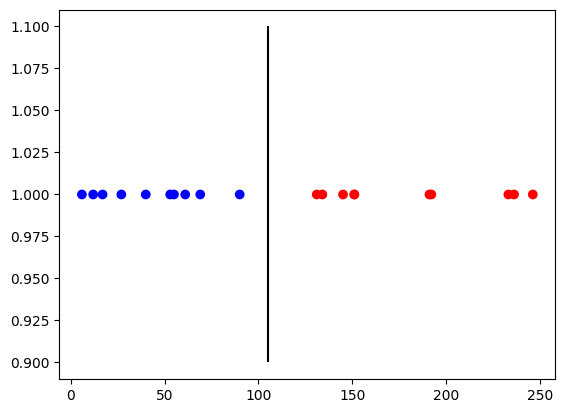

In [34]:
x = np.append(np.random.randint(0, 100, size = 10), np.random.randint(120, 250, size = 10))
clrs = list(map(lambda x: "red" if x >= 120 else "blue", x))
y = np.ones(x.size)
plt.scatter(x, y, c = clrs)
plt.vlines(x = 105, ymax = 1.1, ymin = 0.9, color = "black")
plt.show()

In [35]:
# The above is a linear binary classifier in one dimension, where the black vertical line marks the decision boundary.
# Each data point here has one feature -> its position on the x axis
# If this data is provided to a linear SVM, It'll have no problem 

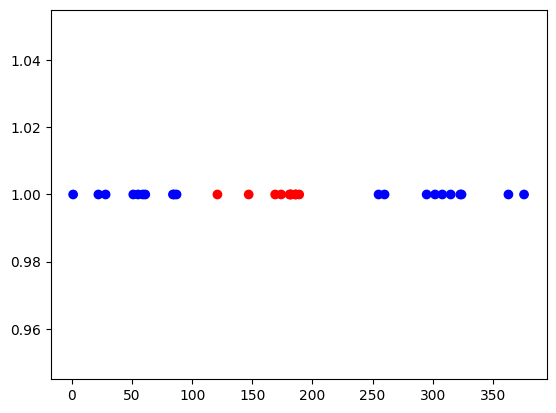

In [40]:
# Let's give the linear SVM a harder problem, where the points are no longer linearly separable.

x = np.append(np.random.randint(0, 100, size = 10), np.random.randint(120, 200, size = 10))
x = np.append(x, np.random.randint(250, 380, size = 10))
clrs = list(map(lambda x: "red" if (x >= 120) and (x < 250) else "blue", x))
y = np.ones(x.size)
plt.scatter(x, y, c = clrs)
plt.show()

In [43]:
# A simple linear decision boundary doesn't have enough expressive power to classify these data points.
# One idea is to transform this data to a 2 dimensional feature space.

# We can generate two dimesnional data points by processing the existing feature -> a feature set of (x_i, x_i^2) can be computed for all data points.

list(zip(x, np.square(x)))[:10]

[(87, 7569),
 (51, 2601),
 (1, 1),
 (28, 784),
 (61, 3721),
 (22, 484),
 (59, 3481),
 (84, 7056),
 (55, 3025),
 (85, 7225)]

In [ ]:
# Here we prepare a second feature that is the square of the first feature.
# We are not adding any new information here.
# Now we'll use the x_i ^2 in the y axes.

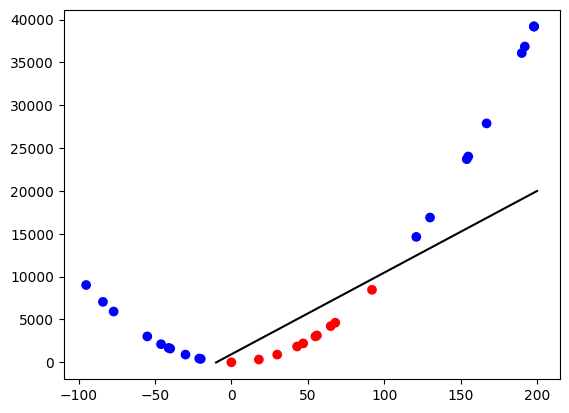

In [75]:
x = np.array([-41, -95, -77, -20, -55, -21, -40, -84, -30, -46,  55,  43,  56, 68,  92,  65,  18,  30,   0,  47, 192, 198, 167, 154, 155,
              198, 198, 130, 190, 121])

y = np.square(x)
clrs = list(map(lambda x: "red" if (x >= 0) and (x < 100) else "blue", x))

plt.scatter(x, y, c = clrs)
plt.plot([-10, 200], [-20, 20000], color = "black")
# plt.grid()
plt.show()

In [72]:
# We can now learn a linear SVM that classifies the data points in the 2D feature space into two classes.
# For any new data points that need prediction, we can make a 2D transformation and make the predictions on the transformed version.

In [73]:
# However, the if we undo the two dimensional transformation, we'd see that the places where the linear decision boundary in the
# 2 dimensional space corresponds to the place where a parabola crosses the x axis in the 1 dimensional space.

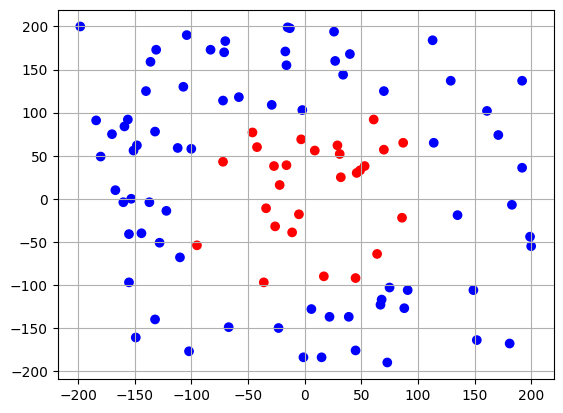

In [88]:
# Let's move to a two dimensional problem.

x = np.random.randint(-200, 201, size = 100)
y = np.random.randint(-200, 201, size = 100)
clrs = list(map(lambda x, y: "red" if (x > -100) & (x < 100) & (y > -100) & (y < 100) else "blue", x, y))
plt.scatter(x, y, c = clrs)
plt.grid(which = "major")
plt.show()